In [1]:
library (tidyverse)
options(repr.matrix.max.rows=6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Name: Cynthia Wei \
Group: 34

# (1) Data Description

Players.csv Dataset
- Info on player demographics and amount of hours played
- Number of Observations: 194
- Number of Variables: 7
  
### Table 1 - player.csv Variables
| Variable | Type | Description |
| ---- | ---- | ---- |
| Experience | fct | the players skill level |
| Subscribe | lgl | If the player has subscribed to the newsletter| 
| hashedEmail | chr | Players email that has been de-identified | 
| Played_hours | dbl | number of hours they played minecraft | 
| Name | chr | name of the player | 
| Gender | fct | gender of the player | 
| Age | int | age of the player (years)|

Sessions.csv Dataset
- Info on how often and how long players played
- number of Observations: 1535
- number of Variables: 3

### Table 2 - sessions.csv Variables
| Variable | Type | Description |
| ---- | ---- | ---- |
| hashedEmail | chr | Players email that has been de-identified | 
| Start_time | chr | when the player started playing (start time of session) | 
| End_time |chr| when the player finished playing (end time of session) | 
| original _start_time | dbl | when the player started playing as a numeric value |  
| original_end_time | dbl | when the player finished playing as a numeric value | 

Potential Issues
- Entries with NA but filtered out
- Many players with 0 hours of playing time which does not offer much insight
- Don’t know how player experience is classified, there is one entry where Morgan, a 9 year old has the experience of a “pro”
- Class imbalance for experience (63 amateurs vs. 13 pros)



# (2) Questions

Broad:
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. (Question 2)

Specific:
Can age and experience level predict the amount of hours played?

I can look at the players who played the longest/most sessions and examine if there were any trends amongst them. I'll examine the top players that played the most hours from the sessions data set and semi join to the players dataset to find the players' demographics.

# (3) Exploratory Data Analysis and Visualization (Code)

### Reading and Wrangling Players.csv

In [2]:
#reading players data
players_data <- read_csv("https://raw.githubusercontent.com/cynthiawei12-hub/DSCI100Individual/refs/heads/main/data/players.csv")

#wrangling players data
players_data_wrangle <- players_data |>
                        drop_na (experience,subscribe, hashedEmail, played_hours, name, gender, Age) |>
                        arrange (-played_hours, Age) |>
                        mutate (experience =as.factor (experience),
                                gender = as.factor (gender),
                                Age = as.integer(Age))
players_data_wrangle

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,4c0662a559f9d83b4d84ce3d86e6577c9f7a426c80465c6174321afd96664da5,0,Selena,Male,46
Regular,FALSE,7b17513f11968feaf6b02977885c436dc2a4549489ca25ef03022f9fbae19d81,0,Balthazar,Male,50
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0,Dylan,Prefer not to say,57


### Summary Statistics

In [3]:
#mean player's data/summary statistics to 2 decimal places
mean_players_data <- players_data_wrangle |>
                        select (played_hours, Age) |>
                        map_df (mean, na.rm=TRUE) |>
                        mutate (Age=round (Age, 2)) |>
                        mutate (played_hours=round (played_hours, 2))
mean_players_data

#Additional Summary statistics from players data set
experience_counts <- players_data_wrangle |>
                group_by (experience) |>
                summarize (count=n())
experience_counts 

gender_counts <- players_data_wrangle |>
                group_by (gender) |>
                summarize (count=n())
gender_counts

played_hours,Age
<dbl>,<dbl>
5.9,21.14


experience,count
<fct>,<int>
Amateur,63
Beginner,35
Pro,13
Regular,35
Veteran,48


gender,count
<fct>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Prefer not to say,11
Two-Spirited,5


### Reading sessions.csv Data

In [5]:
#reading sessions data
sessions_data <- read_csv("https://raw.githubusercontent.com/cynthiawei12-hub/DSCI100Individual/refs/heads/main/data/sessions.csv")
sessions_data 

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### Exploratory Visualizations

hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,47
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41
a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,37


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
Amateur,TRUE,18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,17.2,Kyrie,Male,14
Beginner,FALSE,e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,7.1,Arash,Male,17


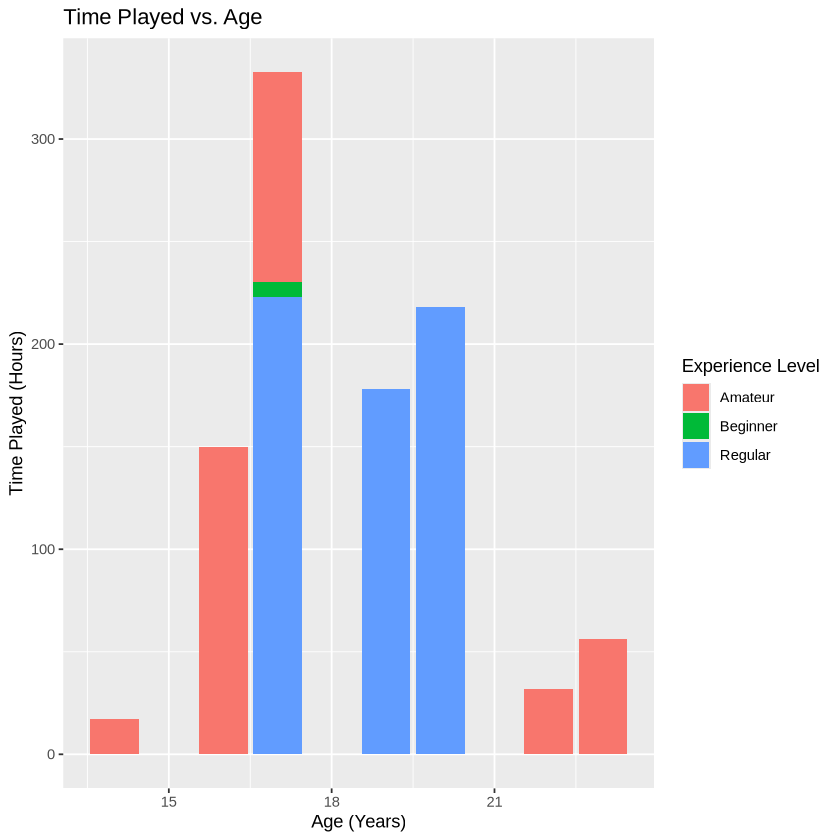

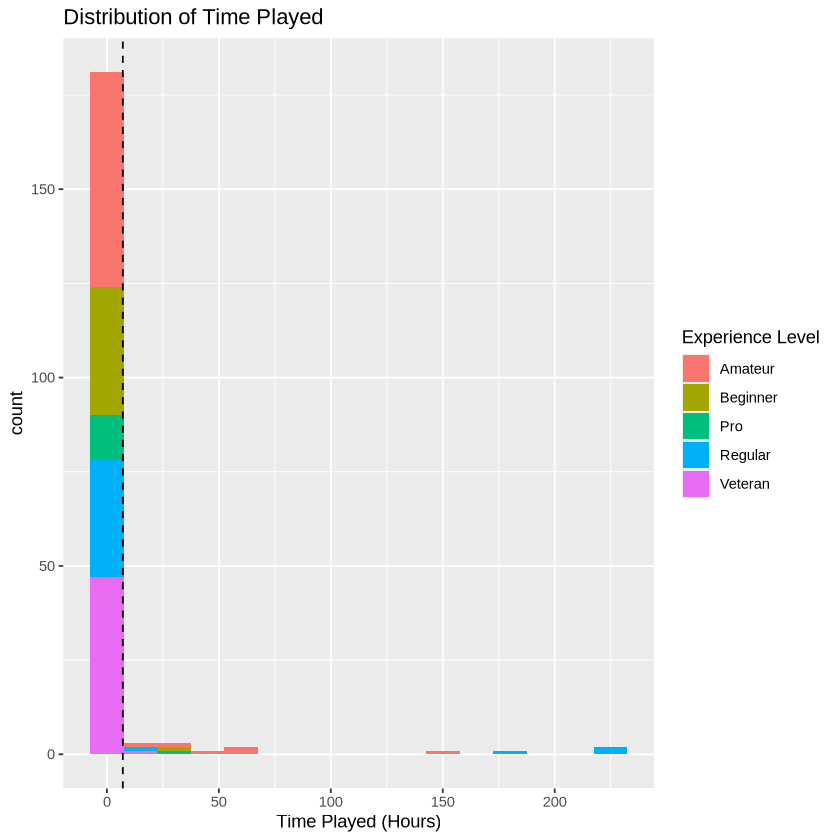

In [6]:
#Top 10 Players that played the most hours
session_data_wrangle <- sessions_data |>
                        group_by (hashedEmail) |>
                        summarize (count=n()) |>
                        slice_max(order_by=count, n=10)
session_data_wrangle

#Top 10 Players Data
top_players <- players_data_wrangle |>
                semi_join (session_data_wrangle,by="hashedEmail")
top_players

#Top 10 Players Visualization
top_players_bar <- top_players |>
                    ggplot (aes (x=Age, y=played_hours, fill=experience)) +
                    geom_bar (stat="identity") +
                    labs (x="Age (Years)", 
                          y="Time Played (Hours)", 
                          fill="Experience Level", 
                          title = "Time Played vs. Age")
                                  
top_players_bar

#Overall Distribution of Played Hours
players_hist <- players_data_wrangle |>
                ggplot (aes (x=played_hours, fill=experience)) +
                geom_histogram (binwidth = 15) +
                labs (x="Time Played (Hours)", title="Distribution of Time Played", fill="Experience Level") +
                geom_vline(xintercept=7.1, linetype="dashed")
players_hist

# (3) Exploratory Data Analysis and Visualization (Description)

Time Played vs. Age Plot
- This plot looks at the top 10 players who played the most hours:
- Most players had the experience level of “regular” or “amateur”
- Players all between ages of 14-23

Distribution of Time played Plot
- Plot looks at the the distribution of the amount of time played in the dataset
- Dashed line at 7.1 = minimum hours played to be in the top 10 players who played the most hours
- Most players played around 0 hours and amongst those who played 0 hours, there is a relatively even split of all experience levels with slightly lower amounts of pro


# (4) Methods and Plan

- Use multivariable linear regression instead of KNN regression as linear regression is more computation efficient and data efficient. Linear regression is used instead of K-nearest neighbours because the predictors are numerical (hours played) and categorical (experience) variables
- Assumption: The relationship between age and experience with played hours is linear
- Limitation:
    - (1) If the relationship is non-linear, non-linear patterns will not be captured
    - (2) If the sample size is small, there may be too many generalizations
    - (3) Both age and experience are used as predictors, sometimes more predictors, in this case, 2, is not always better than 1
- Compare the model by additionally evaluating with KNN regression and comparing their RMSPE values and making sure the linear regression model has the lowest RMSPE value
- Preprocessing data before fitting linear regression model:
    - Convert the variables experience and gender to factor variables
    - Remove NAs
    - Use a 70/30 split for training and testing data after wrangling/cleaning data
    - No need for standardization (center and scale) because linear regression is not based on distances like with KNN neighbours
    - No need for cross validation to choose parameters but cross validation will be used on only the training data to compare with other models or to try different sets of predictors (model tuning process)

 

# (5) GitHub Repository

https://github.com/cynthiawei12-hub/DSCI100Individual 